## 1、加载路透社数据集

In [1]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

G:\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# 可以将索引解码为单词（非必要）
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key)for(key,value)in word_index.items()])
decoded_newswire=''.join([reverse_word_index.get(i-3,'?')for i in train_data[0]])

557056/550378 [==============================] - 3s 5us/step


## 2、准备数据（数据张量化）

In [2]:
import numpy as np
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

## 3、构建网络

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

## 4、编译模型

In [6]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

## 5、验证方法

In [7]:
# 1、留出验证集
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [9]:
# 2、训练模型
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 442us/step - loss: 2.5321 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 249us/step - loss: 1.4453 - acc: 0.6878 - val_loss: 1.3460 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 236us/step - loss: 1.0953 - acc: 0.7652 - val_loss: 1.1711 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 2s 239us/step - loss: 0.8695 - acc: 0.8156 - val_loss: 1.0767 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 237us/step - loss: 0.7032 - acc: 0.8477 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 2s 234us/step - loss: 0.5666 - acc: 0.8799 - val_loss: 0.9413 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 2s 236us/step - loss: 0.4580 - acc: 0.9049 - val_loss: 0.9082 - val_acc: 0.8010


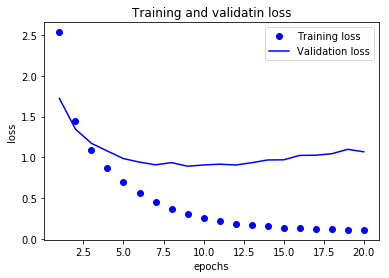

In [10]:
# 3、绘制训练损失和验证损失
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validatin loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

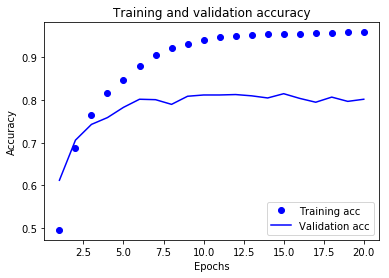

In [11]:
# 4、绘制训练精度和验证精度
acc=history.history['acc']
val_acc=history.history['val_acc']
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 网络在训练9轮后开始过拟合，我们从头训练一个新的网络，共9个轮次，然后再测试集上评估模型。

## 6、从头开始重新训练一个模型

In [16]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val,y_val))

results=model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 334us/step - loss: 2.5432 - acc: 0.5217 - val_loss: 1.6839 - val_acc: 0.6510
Epoch 2/9
7982/7982 [==============================] - 2s 256us/step - loss: 1.3809 - acc: 0.7093 - val_loss: 1.2835 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 2s 247us/step - loss: 1.0238 - acc: 0.7776 - val_loss: 1.1346 - val_acc: 0.7480
Epoch 4/9
7982/7982 [==============================] - 2s 251us/step - loss: 0.8061 - acc: 0.8239 - val_loss: 1.0545 - val_acc: 0.7580
Epoch 5/9
7982/7982 [==============================] - 2s 246us/step - loss: 0.6457 - acc: 0.8609 - val_loss: 0.9754 - val_acc: 0.7980
Epoch 6/9
7982/7982 [==============================] - 2s 237us/step - loss: 0.5175 - acc: 0.8924 - val_loss: 0.9128 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 2s 249us/step - loss: 0.4168 - acc: 0.9144 - val_loss: 0.8993 - val_acc: 0.8230
Epoch 8

In [17]:
results

[1.0233044513929983, 0.7760463045944832]

## 7、新数据上预测结果

In [18]:
predictions=model.predict(x_test)

In [23]:
predictions

array([[8.1290964e-06, 1.0367564e-04, 2.9564017e-05, ..., 2.0510508e-05,
        5.9939175e-06, 9.0888016e-06],
       [8.6915883e-04, 1.4771289e-02, 4.9458565e-03, ..., 3.8058835e-04,
        1.6695743e-05, 1.9614706e-04],
       [1.9076469e-03, 7.4209219e-01, 4.4482853e-03, ..., 1.3784527e-04,
        2.4807313e-03, 1.4910570e-04],
       ...,
       [9.9168219e-06, 2.1186809e-04, 4.3657867e-05, ..., 6.7253432e-06,
        9.8990153e-05, 1.2268481e-05],
       [1.2148111e-03, 1.1205205e-01, 2.8792815e-03, ..., 5.1076192e-04,
        6.6596252e-04, 4.3455872e-04],
       [7.4751320e-04, 5.8729559e-01, 2.5341497e-03, ..., 4.0926352e-05,
        5.6261529e-04, 9.7102289e-05]], dtype=float32)

# 要点：

## 1、如果要对N个类别的数据点进行分类，网络的最后一层应该是大小为N的Dense层


## 2、对于但标签、多分类问题，网络的最后一层应该使用softmax激活，这样可以输出再N个输出类别上的概率分布。

## 3、这种问题的损失函数几乎总是应该使用分类交叉熵。它将网络输出的概率分布与目标的真实分布之间的距离最小化

## 4、处理多分类的标签方法

###  （1）通过分类编码（one-hot编码）对标签进行编码，然后使用categorical_crossentropy作为损失函数

### （2）将标签编码为整数，然后使用sparse_categorical_corssentropy损失函数

## 5、若果需要将数据分到许多类别中，应该避免使用太小的中间层，以免再网络中造成信息瓶颈